## Problem 2

### 2.3

In [370]:
import math

p1 = 0.1
p2 = 0.8

#KL (P,Q)
kl_p_q = p1 * math.log(p1/p2) + (1-p1) * math.log((1-p1)/(1-p2))
txt = "KL(P,Q) = {:0.2f}".format(kl_p_q)
print(txt)

#KL(Q,P)
kl_p_q = p2 * math.log(p2/p1) + (1-p2) * math.log((1-p2)/(1-p1))
txt = "KL(Q,P) = {:0.2f}".format(kl_p_q)
print(txt)

KL(P,Q) = 1.15
KL(Q,P) = 1.36


## Problem #3: Classifiers and Metrics - Coding
### Support Code for Problem 3 (used throughout problem 3)

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# storing the data in a numpy array with column labels as follows:
# ["Age","likeRowing","Experience","Income","Y"]


data = np.array([
    [20,1,0,20,0,0],
    [18,1,1,33,0,0],
    [11,0,1,21,1,0],
    [31,0,0,18,1,0],
    [19,1,1,7,1,0],
    [21,1,0,10,0,0],
    [44,1,0,23,1,0],
    [15,1,1,16,0,0],
    [16,0,1,15,1,0],
    [17,1,0,6,0,0]
],dtype=np.double)



def g_x(x = np.empty((4,1),dtype=np.double)):
    #define theta and theta_0
    theta = np.array([0.05,-3,2.1,0.008],dtype=np.double)
    theta_0 = np.double(0.3)

    #return g(x)
    return np.matmul(np.transpose(theta),x) + theta_0

def f_x(x = np.empty((4,1),dtype = np.double)):
    return np.tanh(g_x(x))

def compute_confusion_matrix(f_x,y,threshold = np.double(0.0)):
    TP = 0
    FP = 0
    FN = 0
    TN = 0

    for i in range(0,f_x.size):
        if y[i] == 1:
            if f_x[i] >= threshold:
                TP += 1
            else:
                FN += 1
        else: #Y = 0
            if f_x[i] < threshold:
                TN += 1
            else:
                FP += 1
    
    return np.array([[TP,FP],[FN,TN]])

def print_confusion_matrix(cm):
    df = pd.DataFrame({"y = +1":cm[:,0],"y = 0":cm[:,1]},
        index = ["f(x) >= threshold","f(x) < threshold"])
    print(df)

def compute_missclassification_error(cm):

    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[0,0]
    TN = cm[1,1]

    return (FP + FN)/(FP + FN + TP + TN)

def compute_true_positive_rate(cm):

    TP = cm[0,0]
    FN = cm[1,0]

    return (TP) / (TP + FN)

def compute_true_negative_rate(cm):

    TN = cm[1,1]
    FP = cm[0,1]

    return (TN) / (TN + FP)

def compute_false_positive_rate(cm):

    FP = cm[0,1]
    TN = cm[1,1]

    return (FP) / (TN + FP)

def compute_precision(cm):

    TP = cm[0,0]
    FP = cm[0,1]

    return (TP) / (TP + FP)

def compute_F1(cm):
    
    precision = compute_precision(cm)
    recall = compute_true_positive_rate(cm)

    return 2 * (precision * recall)/(precision + recall)

def print_summary_statistics(f_x,y,threshold = 0):

    #compute the confusion matrix:
    cm = compute_confusion_matrix(f_x,y,threshold)

    #Print confusion matrix
    txt = "Confusion Matrix:"
    print(txt)
    print_confusion_matrix(cm)
    
    #Print missclassification error
    txt = "\nMissclassification Error: {}\n".format(compute_missclassification_error(cm))
    print(txt)

    #Print Recall (TPR)
    txt = "Recall (TPR): {}\n".format(compute_true_positive_rate(cm))
    print(txt)

    #print Specificity (TNR)
    txt = "Specificity: {}\n".format(compute_true_negative_rate(cm))
    print(txt)

    #Print False Positive Rate
    txt = "False Positive Rate: {}\n".format(compute_false_positive_rate(cm))
    print(txt)

    #print Precision
    txt = "Precision: {}\n".format(compute_precision(cm))
    print(txt)

    #print F1
    txt = "F1: {}\n".format(compute_F1(cm))
    print(txt)

def generate_ROC_curve(f_x,y,show_plt = True):
    
    #put f_x and f_y into an array
    data = np.array([y,f_x]).transpose()

    #sort the array
    data = data[(-1 * data[:,1]).argsort()]

    #initialize an array of (FPR,TPR) coordinates for each threshold
    ROC_points = np.empty((data.shape[0] + 2,2))

    #initialize the first point
    ROC_points[0,:] = [0,0]

    #initialize the last point
    ROC_points[11,:] = [1,1]

    #for each threshold value
    for i in range(0,data.shape[0]):

        #compute the confusion matrix at the threshold
        cm = compute_confusion_matrix(f_x,y,data[i,1])

        #compute the FPR and TPR
        TPR = compute_true_positive_rate(cm)
        FPR = compute_false_positive_rate(cm)

        #save the values in the array
        ROC_points[i + 1,:] = [FPR,TPR]
    
    #plot the ROC curve
    if show_plt:
        plt.plot(ROC_points[:,0],ROC_points[:,1])
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
        plt.show()
    return ROC_points

def plot_misclassification_vs_threshold(f_x,y,step_size = 0.1,show_plt = True):
        #put f_x and f_y into an array
    data = np.array([y,f_x]).transpose()

    #sort the array
    data = data[(-1 * data[:,1]).argsort()]

    max_threshold = data[0,1] + 1
    min_threshold = data[-1,1] - 1

    #initialize an array to hold the plot points
    thresholds_to_test = np.arange(min_threshold,max_threshold,step_size)

    plt_points = np.empty((thresholds_to_test.shape[0],2))

    #for each threshold value
    for i in range(0,thresholds_to_test.shape[0]):

        #compute the confusion matrix at the threshold
        threshold = thresholds_to_test[i]
        cm = compute_confusion_matrix(f_x,y,threshold)

        #compute the FPR and TPR
        miss_class_error = compute_missclassification_error(cm)

        #save the values in the array
        plt_points[i,:] = [threshold,miss_class_error]
    
    #plot the ROC curve
    if show_plt:
        plt.plot(plt_points[:,0],plt_points[:,1])
        plt.xlabel("Threshold")
        plt.ylabel("Miss Classification Error")
        plt.title("Threshold vs Miss Classification Error")
        plt.show()
    return plt_points

def compute_g_x(data,print_output = True):
    #compute g(x) for each x
    for i in range(0,data.shape[0]):
        data[i,5] = g_x(data[i,0:4])

    if print_output:
        df = pd.DataFrame({"Age":data[:,0],
                            "likeRowing":data[:,1],
                            "Experience":data[:,2],
                            "Income":data[:,3],
                            "Y":data[:,4],
                            "g(x)":data[:,5]})
        print(df)
    return data

def compute_f_x(data,print_output = True):
    #compute g(x) for each x
    for i in range(0,data.shape[0]):
        data[i,5] = f_x(data[i,0:4])

    if print_output:
        df = pd.DataFrame({"Age":data[:,0],
                            "likeRowing":data[:,1],
                            "Experience":data[:,2],
                            "Income":data[:,3],
                            "Y":data[:,4],
                            "f(x)":data[:,5]})
        print(df)
    return data

def sort_output(data,f_x_col_idx,f_x_label = "f(x)",print_output = True):
    #print a list sorted by the value of f_x
    sorted_data = data[(-1 *data[:,f_x_col_idx]).argsort()]

    if print_output:
        df = pd.DataFrame({"Age":sorted_data[:,0],
                            "likeRowing":sorted_data[:,1],
                            "Experience":sorted_data[:,2],
                            "Income":sorted_data[:,3],
                            "Y":sorted_data[:,4],
                            f_x_label:sorted_data[:,5]})
        
        print(df)


### Problem 3.1

Calculated Values of g(x)

In [372]:
g_x_computed = compute_g_x(data,True)

    Age  likeRowing  Experience  Income    Y   g(x)
0  20.0         1.0         0.0    20.0  0.0 -1.540
1  18.0         1.0         1.0    33.0  0.0  0.564
2  11.0         0.0         1.0    21.0  1.0  3.118
3  31.0         0.0         0.0    18.0  1.0  1.994
4  19.0         1.0         1.0     7.0  1.0  0.406
5  21.0         1.0         0.0    10.0  0.0 -1.570
6  44.0         1.0         0.0    23.0  1.0 -0.316
7  15.0         1.0         1.0    16.0  0.0  0.278
8  16.0         0.0         1.0    15.0  1.0  3.320
9  17.0         1.0         0.0     6.0  0.0 -1.802


Next, we determine what choise of threshold would minimize misclassification error. To do this, we can generate a plot of threshold vs miss-classification error

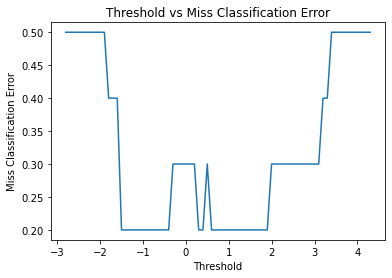

    Age  likeRowing  Experience  Income    Y   g(x)
0  16.0         0.0         1.0    15.0  1.0  3.320
1  11.0         0.0         1.0    21.0  1.0  3.118
2  31.0         0.0         0.0    18.0  1.0  1.994
3  18.0         1.0         1.0    33.0  0.0  0.564
4  19.0         1.0         1.0     7.0  1.0  0.406
5  15.0         1.0         1.0    16.0  0.0  0.278
6  44.0         1.0         0.0    23.0  1.0 -0.316
7  20.0         1.0         0.0    20.0  0.0 -1.540
8  21.0         1.0         0.0    10.0  0.0 -1.570
9  17.0         1.0         0.0     6.0  0.0 -1.802


In [373]:
plt_points = plot_misclassification_vs_threshold(g_x_computed[:,5],g_x_computed[:,4],0.1)

#print out a sorted list of g(x) as well
sort_output(g_x_computed,5,"g(x)",True)

Based on this plot, it is clear that we can minimize misclassification error by putting the threshold in the following intervals: (-1.540,-.316),(0.278,0.406), and (0.564,1.994). Setting the threshold in any of these intervals gives us a missclassification error of 0.2

### Problem 3.2

Start by calculating the values of f(x)

In [374]:
f_x_computed = compute_f_x(data,print_output = True)

    Age  likeRowing  Experience  Income    Y      f(x)
0  20.0         1.0         0.0    20.0  0.0 -0.912120
1  18.0         1.0         1.0    33.0  0.0  0.510939
2  11.0         0.0         1.0    21.0  1.0  0.996092
3  31.0         0.0         0.0    18.0  1.0  0.963601
4  19.0         1.0         1.0     7.0  1.0  0.385071
5  21.0         1.0         0.0    10.0  0.0 -0.917026
6  44.0         1.0         0.0    23.0  1.0 -0.305886
7  15.0         1.0         1.0    16.0  0.0  0.271053
8  16.0         0.0         1.0    15.0  1.0  0.997389
9  17.0         1.0         0.0     6.0  0.0 -0.947013


Next, we determine what choise of threshold would minimize misclassification error. To do this, we can generate a plot of threshold vs miss-classification error

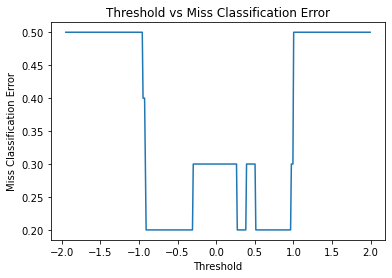

    Age  likeRowing  Experience  Income    Y      f(x)
0  16.0         0.0         1.0    15.0  1.0  0.997389
1  11.0         0.0         1.0    21.0  1.0  0.996092
2  31.0         0.0         0.0    18.0  1.0  0.963601
3  18.0         1.0         1.0    33.0  0.0  0.510939
4  19.0         1.0         1.0     7.0  1.0  0.385071
5  15.0         1.0         1.0    16.0  0.0  0.271053
6  44.0         1.0         0.0    23.0  1.0 -0.305886
7  20.0         1.0         0.0    20.0  0.0 -0.912120
8  21.0         1.0         0.0    10.0  0.0 -0.917026
9  17.0         1.0         0.0     6.0  0.0 -0.947013


In [375]:
plt_points = plot_misclassification_vs_threshold(f_x_computed[:,5],f_x_computed[:,4],0.01)

#print out a sorted list of g(x) as well
sort_output(f_x_computed,5,"f(x)",True)

Based on this plot, it is clear that we can minimize misclassification error by putting the threshold in the following intervals: (-0.912,-0.305),(0.271,0.385), and (0.51,0.96). Setting the threshold in any of these intervals gives us a missclassification error of 0.2. 

Next, we compute the confusion matrix, precision, recall, and F1 score for the threshold from (0.51,0.96) using a threshold of 0.6

In [376]:
#compute relevant statistics for threshold of 0.6
print_summary_statistics(f_x_computed[:,5],f_x_computed[:,4],threshold= 0.6)

Confusion Matrix:
                   y = +1  y = 0
f(x) >= threshold       3      0
f(x) < threshold        2      5

Missclassification Error: 0.2

Recall (TPR): 0.6

Specificity: 1.0

False Positive Rate: 0.0

Precision: 1.0

F1: 0.7499999999999999



### Problem 3.3

Plot the ROC curves with additional points for decision points with minimum classification error

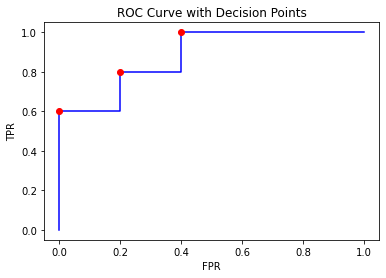

In [377]:
ROC_points = generate_ROC_curve(f_x_computed[:,5],f_x_computed[:,4],show_plt= False)

#using the FPR and TPR from the points in the ranges computed above
decision_points = np.array([[0,0.6],[0.2,0.8],[0.4,1.0]])
plt.plot(ROC_points[:,0],ROC_points[:,1],"b-",decision_points[:,0],decision_points[:,1],"ro")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve with Decision Points")
plt.show()

## Problem 4 Support

## Problem 5

### Problem 5.1

#### Code to Support importing and exporting of the data

In [396]:
from collections import deque

def import_and_format_data(csv,print_preview = True):
    data = pd.read_csv(csv)

    #convert ShelveLoc to be numerical
    d = {"Bad":0,"Medium":1,"Good":2}
    data["ShelveLoc"] = data["ShelveLoc"].map(d)

    #convert urban and US to numerical
    d = {"Yes":0,"No":1}
    data["Urban"] = data["Urban"].map(d)
    data["US"] = data["US"].map(d)

    if print_preview:
        print(data)
    return data

def compute_normalization_constants(data, print_preview = True):

    normalization_constants = np.zeros((3,data.shape[1]))
    cols = data.columns
    indicies = ["min","max","range"]

    #for each row in the data
    for i in range(0,cols.size):
        #get vals from teh column
        vals = data.iloc[:,i].to_numpy()

        #determine min,max, and range
        max_val = vals.max()
        min_val = vals.min()
        range_val = max_val - min_val
        
        #save in the normalization constants array
        normalization_constants[:,i] = np.array([min_val,max_val,range_val]).transpose()

    #return the normalization constants
    norm_constants = pd.DataFrame(normalization_constants,columns=cols,index=indicies)

    if print_preview:
        print(norm_constants)
    return norm_constants

def normalize_data(data,normalization_constants,print_preview = True):

    normed_vals = np.zeros(data.shape)

    #for each column in data, normalize using the normalization constants
    for i in range(0,data.columns.size):
        vals = data.iloc[:,i].to_numpy()
        min_val = normalization_constants.iloc[0,i]
        range_val = normalization_constants.iloc[2,i]
        
        #normalize the data
        vals = np.subtract(vals,min_val)
        vals = np.divide(vals,range_val)

        #save it in the data array
        normed_vals[:,i] = vals
    
    normalized_values = pd.DataFrame(normed_vals,columns= data.columns)

    if print_preview:
        print(normalized_values)

    return normalized_values

def divide_into_folds(data,num_folds):
    num_rows = data.shape[0]
    rows_per_fold = math.floor(num_rows/num_folds)

    folds = deque()

    #create all folds except for the last one
    for i in range(0,num_folds - 1):
        start_idx = rows_per_fold * i
        end_idx = rows_per_fold * (i + 1)
        fold = pd.DataFrame(data.iloc[start_idx:end_idx,:])
        folds.append(fold)
    
    #push the final 
    start_idx = rows_per_fold * (num_folds - 1)
    folds.append(data.iloc[start_idx:,:])

    return folds

def initialize_validation_tracking(validation_rounds,params_to_test):

    data = {}
    for i in range(0,params_to_test.shape[0]):
        key = str(params_to_test[i])
        data[key] = np.zeros(validation_rounds,dtype= np.double)
    
    return pd.DataFrame(data)

def compute_mean_evaluation_metric(measure_results,params_to_test,test_metric = ""):

    #declare an empty array to track the mean results
    mean_results = np.zeros(params_to_test.shape[0],dtype= np.double)

    #declare array to track best parameter
    best_mean_result = 0
    best_param = params_to_test[0]

    for i in range(0,params_to_test.shape[0]):

        #get the results for the specific parameter
        key = str(params_to_test[i])
        results = measure_results[key].to_numpy()
        mean = np.mean(results)
        mean_results[i] = mean

        #check if this is the best one
        if mean > best_mean_result or i == 0:
            best_mean_result = mean
            best_param = params_to_test[i]
    
    #create a DataFrame for the evaluation metrics
    result_summary = pd.DataFrame(np.array([mean_results]),columns=measure_results.columns,
     index=[test_metric])

    return result_summary,best_param

### 5.2 Using Decision Trees

#### SKLEARN code

In [379]:
#training with sklearn

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import math

def train_with_sklearn(X,Y,features,max_depth = 5,plot_tree = True):
    dtree = DecisionTreeClassifier(max_depth=max_depth)
    dtree = dtree.fit(X,Y)

    if plot_tree:
        tree.plot_tree(dtree,feature_names= features)
    return dtree

def test_sklearn(dtree,X_test,Y_test,print_results = False):
    f_x = dtree.predict(X_test)

    cm = compute_confusion_matrix(f_x,Y_test,threshold= 0.5)

    f1 = compute_F1(cm)
    accuracy = 1 - compute_missclassification_error(cm)

    if print_results:
        print_summary_statistics(f_x,Y_test,threshold=0.5)
    
    return f1,accuracy

def k_fold_sklearn(data,depths_to_test,num_folds):
    #split data into folds
    folds = divide_into_folds(data,num_folds)

    #set asside test fold
    test_fold = folds.pop()

    #initialize variables for performing cross validation
    validation_rounds = num_folds - 1
    measure_results = initialize_validation_tracking(validation_rounds,depths_to_test)
    features = data.columns[1:]

    for round_idx in range(0,validation_rounds):
        #reserve a validation set from the training set
        validation_fold = folds.popleft()
        training_sets = pd.concat(folds)

        #identify inputs and outputs for training
        X_train = pd.DataFrame(training_sets.iloc[:,1:])
        Y_train = pd.DataFrame(training_sets.iloc[:,0])

        #identify inputs and outputs for validation
        X_validation = pd.DataFrame(validation_fold.iloc[:,1:])
        Y_validation = pd.DataFrame(validation_fold.iloc[:,0])

        #train algorithm on the rest of the training set for each K, evaluate on validation set
        for depth_idx in range(0,depths_to_test.size):
            depth = depths_to_test[depth_idx]

            #train the algorithm
            dtree = train_with_sklearn(X_train,Y_train,features,max_depth=depth,plot_tree=False)

            #evaluate on validation set
            f1,accuracy = test_sklearn(dtree,X_validation,Y_validation.to_numpy(),print_results=False)

            #record validation metric
            measure_results.iat[round_idx,depth_idx] = f1

        #rotate validation fold and repeat
        folds.append(validation_fold)

    #report mean of evaluation measure for each K over the validation folds
    result_summary,best_param = compute_mean_evaluation_metric(measure_results,depths_to_test,"F1")

    txt = "Mean results (average F1 score) of K-fold cross validation on {} folds \n {}".format(num_folds,result_summary)
    print(txt)
    #choose the best K

    txt = "Training on depth of {}\n".format(best_param)
    print(txt)
    
    #train on the full training set, evaluate on the test set
    training_set = pd.concat(folds)
    X_train = pd.DataFrame(training_set.iloc[:,1:])
    Y_train = pd.DataFrame(training_set.iloc[:,0])
    dtree = train_with_sklearn(X_train,Y_train,features,max_depth=best_param,plot_tree=True)

    
    X_test = pd.DataFrame(test_fold.iloc[:,1:])
    Y_test = pd.DataFrame(test_fold.iloc[:,0])

    #evaluate on testing set
    f1,accuracy = test_sklearn(dtree,X_test,Y_test.to_numpy(),print_results=False)
    txt = "\nResults on testing fold:\n \tF1: {:0.2f}\n \tAccuracy: {:0.2f}".format(f1,accuracy)
    print(txt)

    #return the final model
    return dtree


Mean results (average F1 score) of K-fold cross validation on 5 folds 
            3         4         5         6         7
F1  0.511927  0.559441  0.570808  0.548379  0.586847
Training on depth of 7


Results on testing fold:
 	F1: 0.60
 	Accuracy: 0.59


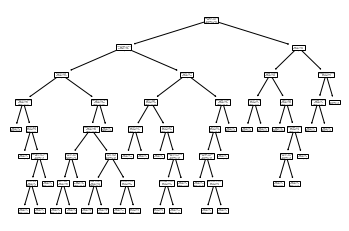

In [404]:
#run cross validation using sklearn and obtain a final model

data_train = import_and_format_data("carseats_train.csv",print_preview= False)
depths_to_test = np.array([3,4,5,6,7])

dtree = k_fold_sklearn(data_train,depths_to_test,5)

In [405]:
# determine the full accuracy of the model using the supplied test data file
data_test = import_and_format_data("carseats_test.csv",print_preview=False)

X_test = pd.DataFrame(data_test.iloc[:,1:])
Y_test = pd.DataFrame(data_test.iloc[:,0])

#evaluate on testing set
f1,accuracy = test_sklearn(dtree,X_test,Y_test.to_numpy(),print_results=False)
txt = "\nResults on actual testing data:\n \tF1: {:0.2f}\n \tAccuracy: {:0.2f}".format(f1,accuracy)
print(txt)


Results on actual testing data:
 	F1: 0.75
 	Accuracy: 0.76


#### Decision Trees with GODST

In [382]:
#train with GODST
import pandas as pd
import numpy as np
import pathlib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from gosdt.model.threshold_guess import compute_thresholds, cut
from gosdt.model.gosdt import GOSDT
from sklearn.preprocessing import OneHotEncoder
import time


def config_GOSDT_data(data_train,data_test):

    #set asside the X and Y for training
    X = pd.DataFrame(data_train.iloc[:,1:])
    Y = pd.DataFrame(data_train.iloc[:,0])

    #set asside X and Y for testing
    X_test = pd.DataFrame(data_test.iloc[:,1:])
    Y_test = pd.DataFrame(data_test.iloc[:,0])

    #leverage the GHOST example code to guess thresholds and lower bounds to improve performance

    h = X.columns

    # GBDT parameters for threshold and lower bound guesses
    n_est = 40
    max_depth = 1

    # guess thresholds
    X = pd.DataFrame(X, columns=h)
    print("X:", X.shape)
    print("y:",Y.shape)
    X_train, thresholds, header, threshold_guess_time = compute_thresholds(X, Y, n_est, max_depth)

    #configure X_test as well
    X_test = cut(X_test.copy(),thresholds)
    X_test = X_test[header]

    #print(X_train.shape)
    #print(X_test.shape)
    
    txt = "train set column names == test set column names: {}".format(list(X_train.columns) == 
        list(X_test.columns))
    print(txt)

    Y_train = pd.DataFrame(Y)

    # guess lower bound
    start_time = time.perf_counter()
    clf = GradientBoostingClassifier(n_estimators=n_est, max_depth=max_depth, random_state=42)
    clf.fit(X_train, Y_train.values.flatten())
    warm_labels = clf.predict(X_train)

    elapsed_time = time.perf_counter() - start_time

    lb_time = elapsed_time

    # save the labels as a tmp file and return the path to it.
    labelsdir = pathlib.Path('/tmp/warm_lb_labels')
    labelsdir.mkdir(exist_ok=True, parents=True)

    labelpath = labelsdir / 'warm_label.tmp'
    labelpath = str(labelpath)
    pd.DataFrame(warm_labels, columns=["class_labels"]).to_csv(labelpath, header="class_labels",index=None)

    return X_train,Y_train, X_test, Y_test, labelpath

def train_GOSDT_model(X,Y,labelpath,depth_budget = 5,regularization = 0.01):
    # train GOSDT model
    config = {
                "allow_small_reg": True,
                "regularization": regularization,
                "depth_budget": depth_budget,
                "time_limit": 60,
                "warm_LB": True,
                "path_to_labels": labelpath,
                "similar_support": False,
            }

    model = GOSDT(config)
    model.fit(X, Y)

    return model

def test_GOSDT(model,X_test,Y_test,print_results = False):
    f_x = model.predict(X_test)

    cm = compute_confusion_matrix(f_x,Y_test,threshold= 0.5)

    f1 = compute_F1(cm)
    accuracy = 1 - compute_missclassification_error(cm)

    if print_results:
        print_summary_statistics(f_x,Y_test,threshold=0.5)
    
    return f1,accuracy

def print_GOSDT_summary(model,X_train,Y_train):
    print("evaluate the model, extracting tree and scores", flush=True)

    # get the results
    train_acc = model.score(X_train, Y_train)
    n_leaves = model.leaves()
    n_nodes = model.nodes()
    time = model.utime

    print("Model training time: {}".format(time))
    print("Training accuracy: {}".format(train_acc))
    print("# of leaves: {}".format(n_leaves))
    print(model.tree)

def k_fold_GOSDT(X_train,Y_train,labelpath,regularizations_to_test,num_folds):
    #since GOSDT prints a lot of stuff as is, save all prints to a variable and return it as output
    out_txt = ""
    
    #split data into folds
    X_folds = divide_into_folds(X_train,num_folds)
    Y_folds = divide_into_folds(Y_train,num_folds)

    #set asside test fold
    X_test = X_folds.pop()
    Y_test = Y_folds.pop()

    #initialize variables for performing cross validation
    validation_rounds = num_folds - 1
    measure_results = initialize_validation_tracking(validation_rounds,regularizations_to_test)
    features = X_train.columns

    for round_idx in range(0,validation_rounds):
        #reserve a validation set from the training set
        X_validation = X_folds.popleft()
        Y_validation = Y_folds.popleft()

        X_train = pd.DataFrame(pd.concat(X_folds))
        Y_train = pd.DataFrame(pd.concat(Y_folds))

        #train algorithm on the rest of the training set for each K, evaluate on validation set
        for reg_idx in range(0,regularizations_to_test.size):
            reg = regularizations_to_test[reg_idx]

            #train the algorithm
            model = train_GOSDT_model(X_train,Y_train,labelpath,depth_budget=6,regularization=reg)

            #evaluate on validation set
            f1,accuracy = test_GOSDT(model,X_validation,Y_validation.to_numpy(),print_results=False)

            #record validation metric
            measure_results.iat[round_idx,reg_idx] = f1

        #rotate validation fold and repeat
        X_folds.append(X_validation)
        Y_folds.append(Y_validation)

    #report mean of evaluation measure for each K over the validation folds
    result_summary,best_param = compute_mean_evaluation_metric(measure_results,regularizations_to_test,"F1")

    txt = "Mean results (average F1 score) of K-fold cross validation on {} folds \n {}\n".format(num_folds,result_summary)
    print(txt)
    out_txt = out_txt + txt
    #choose the best K

    txt = "Training on depth of {}\n".format(best_param)
    print(txt)
    out_txt = out_txt + txt
    
    #train on the full training set, evaluate on the test set
    X_train = pd.DataFrame(pd.concat(X_folds))
    Y_train = pd.DataFrame(pd.concat(Y_folds))
    model = train_GOSDT_model(X_train,Y_train,labelpath,depth_budget=5,regularization=best_param)

    #evaluate on testing set
    f1,accuracy = test_GOSDT(model,X_test,Y_test.to_numpy(),print_results=False)
    txt = "\nResults on testing fold:\n \tF1: {:0.2f}\n \tAccuracy: {:0.2f}\n".format(f1,accuracy)
    print(txt)
    out_txt = out_txt + txt

    #return the final model
    return model,out_txt

def k_fold_GOSDT_alt(data_train,data_test,regularizations_to_test,num_folds):
    #since GOSDT prints a lot of stuff as is, save all prints to a variable and return it as output
    out_txt = ""
    
    #split data into folds
    folds = divide_into_folds(data_train,num_folds)

    #set asside test fold
    test_fold = folds.pop()

    #initialize variables for performing cross validation
    validation_rounds = num_folds - 1
    measure_results = initialize_validation_tracking(validation_rounds,regularizations_to_test)

    for round_idx in range(0,validation_rounds):
        #reserve a validation set from the training set
        validation_fold = folds.popleft()
        training_sets = pd.concat(folds)

        X_train,Y_train, X_validation, Y_validation, labelpath = config_GOSDT_data(training_sets,validation_fold)

        #train algorithm on the rest of the training set for each K, evaluate on validation set
        for reg_idx in range(0,regularizations_to_test.size):
            reg = regularizations_to_test[reg_idx]

            #train the algorithm
            model = train_GOSDT_model(X_train,Y_train,labelpath,depth_budget=6,regularization=reg)

            #evaluate on validation set
            f1,accuracy = f1,accuracy = test_GOSDT(model,X_validation,Y_validation.to_numpy(),print_results=False)

            #record validation metric
            measure_results.iat[round_idx,reg_idx] = f1

        #rotate validation fold and repeat
        folds.append(validation_fold)

    #report mean of evaluation measure for each K over the validation folds
    result_summary,best_param = compute_mean_evaluation_metric(measure_results,regularizations_to_test,"F1")

    txt = "Mean results (average F1 score) of K-fold cross validation on {} folds \n {}\n".format(num_folds,result_summary)
    print(txt)
    out_txt = out_txt + txt
    #choose the best K

    txt = "Training on regularization of {}\n".format(best_param)
    print(txt)
    out_txt = out_txt + txt
    
    #train on the full training set, evaluate on the test set
    training_set = pd.concat(folds)
    X_train,Y_train, X_test, Y_test, labelpath = config_GOSDT_data(training_sets,test_fold)
    #train the algorithm
    model = train_GOSDT_model(X_train,Y_train,labelpath,depth_budget=6,regularization=best_param)

    #evaluate on validation set
    f1,accuracy = f1,accuracy = test_GOSDT(model,X_test,Y_test.to_numpy(),print_results=False)

    #evaluate on testing set
    txt = "\nResults on testing fold:\n \tF1: {:0.2f}\n \tAccuracy: {:0.2f}".format(f1,accuracy)
    print(txt)
    out_txt = out_txt + txt

    #since there is another full testing set, reformat the actual testing data file so it can be used in testing
    #train on the full training data file
    training_set = pd.concat(folds)
    X_train,Y_train, X_test, Y_test, labelpath = config_GOSDT_data(data_train,data_test)
    #train the algorithm
    model = train_GOSDT_model(X_train,Y_train,labelpath,depth_budget=6,regularization=best_param)

    #return the final model
    return model,out_txt,X_train,Y_train,X_test, Y_test

In [406]:

data_train = import_and_format_data("carseats_train.csv",print_preview= False)
data_test = import_and_format_data("carseats_test.csv",print_preview=False)

X_train,Y_train, X_test, Y_test, labelpath = config_GOSDT_data(data_train,data_test)

regularizations_to_test = np.array([0.01,0.001,0.0005])

model,out_txt,X_train,Y_train,X_test, Y_test = k_fold_GOSDT_alt(data_train,data_test,regularizations_to_test,5)


X: (282, 10)
y: (282, 1)
train set column names == test set column names: True
X: (168, 10)
y: (168, 1)
train set column names == test set column names: True
gosdt reported successful execution
training completed. 0.000/0.000/0.014 (user, system, wall), mem=0 MB
bounds: [0.214762..0.214762] (0.000000) loss=0.154762, iterations=2410
gosdt reported successful executionRegularization smaller than 1/(num_samples) - this may lead to longer training time if not adjusted.
training completed. 0.000/0.000/0.030 (user, system, wall), mem=0 MB
bounds: [0.140952..0.140952] (0.000000) loss=0.130952, iterations=4870

gosdt reported successful executionRegularization smaller than 1/(num_samples) - this may lead to longer training time if not adjusted.

training completed. 0.000/0.000/0.030 (user, system, wall), mem=0 MB
bounds: [0.135952..0.135952] (0.000000) loss=0.130952, iterations=4871
X: (168, 10)
y: (168, 1)
train set column names == test set column names: True
gosdt reported successful executi

In [407]:
print(out_txt)

f1,accuracy = test_GOSDT(model,X_test,Y_test.to_numpy(),print_results=False)
txt = "After testing on actual test set, results are as follows: \n\tF1:{}\n\tAccuracy:{}\n".format(f1,accuracy)
print(txt)


Mean results (average F1 score) of K-fold cross validation on 5 folds 
         0.01     0.001    0.0005
F1  0.565304  0.543164  0.576646
Training on regularization of 0.0005

Results on testing fold:
 	F1: 0.71
 	Accuracy: 0.74
After testing on actual test set, results are as follows: 
	F1:0.7543859649122807
	Accuracy:0.7627118644067796



In [408]:
print_GOSDT_summary(model,X_train,Y_train)



evaluate the model, extracting tree and scores
Model training time: 0.0
Training accuracy: 0.8404255319148937
# of leaves: 12
if Age<=60.5 = 1 and Price<=106.5 = 1 and ShelveLoc<=0.5 = 1 then:
    predicted class: 0
    misclassification penalty: 0.014
    complexity penalty: 0.001

else if Age<=60.5 = 1 and Price<=106.5 = 1 and ShelveLoc<=0.5 != 1 then:
    predicted class: 1
    misclassification penalty: 0.018
    complexity penalty: 0.001

else if Advertising<=8.5 = 1 and Age<=60.5 = 1 and Income<=60.5 = 1 and Price<=106.5 != 1 then:
    predicted class: 0
    misclassification penalty: 0.014
    complexity penalty: 0.001

else if Advertising<=8.5 != 1 and Age<=60.5 = 1 and Income<=60.5 = 1 and Price<=106.5 != 1 and ShelveLoc<=1.5 = 1 then:
    predicted class: 0
    misclassification penalty: 0.007
    complexity penalty: 0.001

else if Advertising<=8.5 != 1 and Age<=60.5 = 1 and Income<=60.5 = 1 and Price<=106.5 != 1 and ShelveLoc<=1.5 != 1 then:
    predicted class: 1
    miscla

## 5.3 KNN Algorithm

In [400]:
def knn_classify(x_train,y_train,x_test_array,N=5,distance_metric = "Euclidian"):
    #convert data_frames to numpy
    x_train = x_train.to_numpy()
    y_train = y_train.to_numpy()
    x_test_array = x_test_array.to_numpy()

    predicted_vals = np.zeros((x_test_array.shape[0],1))
    
    #compute distances to points

    for i in range(0,x_test_array.shape[0]):
        x_test_point = x_test_array[i,:]

        if distance_metric == "Euclidian":
            distances = compute_euclidian_distance(x_train,y_train,x_test_point)
        else: # distance_metric == "Manhattan":
            distances = compute_manhattan_distance(x_train,y_train,x_test_point)
        
        #sort distances
        sorted_indicies = distances[:,0].argsort()
        sorted_distances = distances[sorted_indicies[0:N]]
        neighbor_vals = y_train[sorted_indicies[0:N]]

        #determine the nearest N nearest neighbors
        counts = np.bincount(neighbor_vals[:,0],minlength=2)

        if counts[1] >= counts[0]:
            predicted_vals[i,0] = 1
        else:
            predicted_vals[i,0] = 0

    return predicted_vals

def compute_euclidian_distance(x_train,y_train,x_test_point):

    distances = np.zeros((y_train.size,1))

    differences = np.subtract(x_train,x_test_point)
    distances[:,0] = np.sum(np.square(differences),axis=1)

    return distances

def compute_manhattan_distance(x_train,y_train,x_test_point):
    distances = np.zeros((y_train.size,1))

    differences = np.subtract(x_train,x_test_point)
    distances[:,0] = np.sum(np.absolute(differences),axis=1)

    return distances

def test_KNN(config,X,Y,X_test,Y_test,print_results = False):
    #assuming all data has already been normalized
    N = int(config[0])
    distance_metric = config[1]
    f_x = knn_classify(X,Y,X_test,N=N,distance_metric=distance_metric)

    cm = compute_confusion_matrix(f_x,Y_test.to_numpy(),threshold= 0.5)

    f1 = compute_F1(cm)
    accuracy = 1 - compute_missclassification_error(cm)

    if print_results:
        print_summary_statistics(f_x,Y_test,threshold=0.5)
    
    return f1,accuracy

def k_fold_KNN(data,test_configs,num_folds):
    #compute the normalization constants for the full data set so that the data can be normalized
    X = pd.DataFrame(data.iloc[:,1:])
    normalization_constants = compute_normalization_constants(X, print_preview=False)
    #X_normalized = normalize_data(X,normalization_constants,print_preview=False)

    folds = divide_into_folds(data,num_folds)

    #set asside test fold
    test_fold = folds.pop()

    #initialize variables for performing cross validation
    validation_rounds = num_folds - 1
    measure_results = initialize_validation_tracking(validation_rounds,test_configs)
    features = data.columns[1:]

    for round_idx in range(0,validation_rounds):
        #reserve a validation set from the training set
        validation_fold = folds.popleft()
        training_sets = pd.concat(folds)

        #identify inputs and outputs for training
        X_train = pd.DataFrame(training_sets.iloc[:,1:])
        X_train_normalized = normalize_data(X_train,normalization_constants,print_preview=False)
        Y_train = pd.DataFrame(training_sets.iloc[:,0])

        #identify inputs and outputs for validation
        X_validation = pd.DataFrame(validation_fold.iloc[:,1:])
        X_validation_normalized = normalize_data(X_validation,normalization_constants,print_preview=False)
        Y_validation = pd.DataFrame(validation_fold.iloc[:,0])

        #train algorithm on the rest of the training set for each K, evaluate on validation set
        for config_idx in range(0,test_configs.shape[0]):
            config = test_configs[config_idx]

            #evaluate on validation set
            f1,accuracy = test_KNN(config,
            X_train_normalized,Y_train,
            X_validation_normalized,Y_validation,print_results = False)

            #record validation metric
            measure_results.iat[round_idx,config_idx] = f1

        #rotate validation fold and repeat
        folds.append(validation_fold)

    #report mean of evaluation measure for each K over the validation folds
    result_summary,best_param = compute_mean_evaluation_metric(measure_results,test_configs,"F1")

    txt = "Mean results (average F1 score) of K-fold cross validation on {} folds \n {}".format(num_folds,result_summary)
    print(txt)
    #choose the best K

    txt = "Using config with N:{} and distance_metric:{}\n".format(best_param[0],best_param[1])
    print(txt)
    
    #train on the full training set, evaluate on the test set
    training_set = pd.concat(folds)
    X_train = pd.DataFrame(training_set.iloc[:,1:])
    X_train_normalized = normalize_data(X_train,normalization_constants,print_preview=False)
    Y_train = pd.DataFrame(training_set.iloc[:,0])

    
    X_test = pd.DataFrame(test_fold.iloc[:,1:])
    X_test_normalized = normalize_data(X_test,normalization_constants,print_preview=False)
    Y_test = pd.DataFrame(test_fold.iloc[:,0])

    #evaluate on testing set
    f1,accuracy = test_KNN(best_param,
            X_train_normalized,Y_train,
            X_test_normalized,Y_test,print_results = False)
    txt = "\nResults on testing fold:\n \tF1: {:0.2f}\n \tAccuracy: {:0.2f}".format(f1,accuracy)
    print(txt)

    #return the final model
    return best_param,normalization_constants


In [409]:

data = import_and_format_data("carseats_train.csv",print_preview=False)
X_train = pd.DataFrame(data.iloc[:,1:])
Y_test = pd.DataFrame(data.iloc[:,0])

test_configs = np.array([
                            (1,"Euclidian"),
                            (3,"Euclidian"),
                            (5,"Euclidian"),
                            (1,"Manhattan"),
                            (3,"Manhattan"),
                            (5,"Manhattan")])

#run k-fold cross validation
config, normalization_constants = k_fold_KNN(data,test_configs,10)

data = import_and_format_data("carseats_test.csv",print_preview=False)
X_test = pd.DataFrame(data.iloc[:,1:])
Y_test = pd.DataFrame(data.iloc[:,0])

X_train_normalized = normalize_data(X_train,normalization_constants,print_preview=False)
X_test_normalized = normalize_data(X_test,normalization_constants,print_preview=False)

f1,accuracy = test_KNN(config,
            X_train_normalized,Y_train,
            X_test_normalized,Y_test,print_results = False)

txt = "After testing on actual test set, results are as follows: \n\tF1:{}\n\tAccuracy:{}\n".format(f1,accuracy)
print(txt)

Mean results (average F1 score) of K-fold cross validation on 10 folds 
     ['1' 'Euclidian']  ['3' 'Euclidian']  ['5' 'Euclidian']  \
F1           0.529335            0.58488           0.544718   

    ['1' 'Manhattan']  ['3' 'Manhattan']  ['5' 'Manhattan']  
F1           0.552037           0.520875           0.521905  
Using config with N:3 and distance_metric:Euclidian


Results on testing fold:
 	F1: 0.72
 	Accuracy: 0.77
After testing on actual test set, results are as follows: 
	F1:0.6666666666666667
	Accuracy:0.7033898305084746



## 5.4
Summary of results:

SKLEARN (depth of 7 using 5 fold K-fold cross validation for parameter tuning): 
    Accuracy:0.75
    F1: 0.76

GOSDT (regularization of 0.005 using 5 fold K-fold cross validation for parameter tuning): 
    Accuracy:0.75
    F1: 0.76

KNN (N = 3 with Euclidian Distance using 10 fold K-fold cross validation for parameter tuning): 
    Accuracy:0.70
    F1: 0.66

Based on the following results, it appears that SKLEARN and GOSDT did the best in my case with both achieving similar results. KNN performed similarly, but just slightly worst
    

## 5.5
The main difference between K-fold cross-validatoin and leave-one-out-cross-validation (LOOCV) is that LOOCV separates a "test" set that is set asside and used on each of the training iterations (i.e: only the training set and validation set rotate through the folds). This is compared to k-fold cross-validation where the testing set is also rotated for each training iterations (i.e: the training, validation, and testing set all rotate). One disadvantage of LOOCV is that the model inherently has less data to train on because it is never exposed to the data in the "training" set. Another disadvantage of LOOCV is that if data is imballanced and there are only a few samples of a certain class. There is a possibility that these samples may mostly fall into the "test" set and thus the model will never be exposed to those samples. Even if only a few of the samples fall into the "test" fold, it could be detrimental because the model still won't be able to train on them.

## 5.6
I think that F1 was a good evaluation metric for this data set because it provides a good balance between the precision and recall vs accuracy which only depends on the miss-classficiation rate. With that said though, for this data set, both F1 and Accuracy identified the best model and there wasn't much difference between the F1 and Accuracy statistics for the models that I trained.